# Applying PCA on a Dataset 
#### This is dataset is taken from the Models.ipynb file where Data cleaning and exploration is done refer that for the same

In [41]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("data.xlsx")
df

,Unnamed: 0,n_unique_tokens,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_avg,kw_avg_avg,self_reference_max_shares,...,global_sentiment_polarity,global_rate_positive_words,rate_negative_words,title_subjectivity,title_sentiment_polarity,popularity,kw_min_max_spread,kw_avg_spread,average_token_length_times_num_keywords,average_positive_polarity
0,0,0.872236,0,1,0,0,0,0.000000,0.000000,7.915783,...,0.092562,0.045662,0.230769,0.793701,-0.187500,0,0.000000,0.000000,23.401826,0.582079
1,1,0.845649,0,0,0,0,0,0.000000,0.000000,0.000000,...,0.148948,0.043137,0.266667,0.000000,0.000000,0,0.000000,0.000000,19.654902,0.510915
2,2,0.831614,0,0,0,0,0,0.000000,0.000000,9.718835,...,0.323333,0.056872,0.142857,0.000000,0.000000,1,0.000000,0.000000,26.360190,0.732079
3,3,0.795700,0,1,0,0,0,0.000000,0.000000,0.000000,...,0.100705,0.041431,0.333333,0.000000,0.000000,0,0.000000,0.000000,30.834275,0.657357
4,4,0.746290,0,0,0,1,0,0.000000,0.000000,25.198421,...,0.281003,0.074627,0.139785,0.768881,0.136364,0,0.000000,0.000000,32.779851,0.660915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,39639,0.808784,0,0,0,1,0,2514.742857,14.472187,36.342412,...,0.141964,0.037572,0.277778,0.464159,0.000000,1,30.962917,-101.014925,36.184971,0.607079
39640,39640,0.886335,0,0,1,0,0,1664.267857,15.054117,12.805792,...,0.194249,0.039634,0.187500,0.669433,1.000000,1,19.662556,-126.211460,30.838415,0.607357
39641,39641,0.802262,0,0,0,0,0,1753.882353,16.142528,11.186889,...,0.024609,0.033937,0.423077,0.768881,0.136364,1,19.370906,-101.616822,40.615385,0.507357
39642,39642,0.814070,0,0,0,0,1,0.000000,12.114406,7.674430,...,-0.008066,0.020528,0.533333,0.000000,0.000000,0,1.000000,64.380082,24.875367,0.448425


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df

,n_unique_tokens,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_avg,kw_avg_avg,self_reference_max_shares,weekday_is_monday,...,global_sentiment_polarity,global_rate_positive_words,rate_negative_words,title_subjectivity,title_sentiment_polarity,popularity,kw_min_max_spread,kw_avg_spread,average_token_length_times_num_keywords,average_positive_polarity
0,0.872236,0,1,0,0,0,0.000000,0.000000,7.915783,1,...,0.092562,0.045662,0.230769,0.793701,-0.187500,0,0.000000,0.000000,23.401826,0.582079
1,0.845649,0,0,0,0,0,0.000000,0.000000,0.000000,1,...,0.148948,0.043137,0.266667,0.000000,0.000000,0,0.000000,0.000000,19.654902,0.510915
2,0.831614,0,0,0,0,0,0.000000,0.000000,9.718835,1,...,0.323333,0.056872,0.142857,0.000000,0.000000,1,0.000000,0.000000,26.360190,0.732079
3,0.795700,0,1,0,0,0,0.000000,0.000000,0.000000,1,...,0.100705,0.041431,0.333333,0.000000,0.000000,0,0.000000,0.000000,30.834275,0.657357
4,0.746290,0,0,0,1,0,0.000000,0.000000,25.198421,1,...,0.281003,0.074627,0.139785,0.768881,0.136364,0,0.000000,0.000000,32.779851,0.660915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.808784,0,0,0,1,0,2514.742857,14.472187,36.342412,0,...,0.141964,0.037572,0.277778,0.464159,0.000000,1,30.962917,-101.014925,36.184971,0.607079
39640,0.886335,0,0,1,0,0,1664.267857,15.054117,12.805792,0,...,0.194249,0.039634,0.187500,0.669433,1.000000,1,19.662556,-126.211460,30.838415,0.607357
39641,0.802262,0,0,0,0,0,1753.882353,16.142528,11.186889,0,...,0.024609,0.033937,0.423077,0.768881,0.136364,1,19.370906,-101.616822,40.615385,0.507357
39642,0.814070,0,0,0,0,1,0.000000,12.114406,7.674430,0,...,-0.008066,0.020528,0.533333,0.000000,0.000000,0,1.000000,64.380082,24.875367,0.448425


#### While applying PCA it is important to understand that we can't apply it to categorical or one hot encoded data as it is sparse and high-dimensional.
#### PCA might not effectively reduce dimensionality in a meaningful way because it relies on variance, which might be low for one-hot encoded features. 

In [43]:
# Therefore separating continuous/numerical variable columns from the dataset
con_columns=[]
for column in df.columns:
    if df[column].nunique() > 2:
        con_columns.append(column)
con_columns
    

['n_unique_tokens',
 'kw_min_avg',
 'kw_avg_avg',
 'self_reference_max_shares',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'rate_negative_words',
 'title_subjectivity',
 'title_sentiment_polarity',
 'kw_min_max_spread',
 'kw_avg_spread',
 'average_token_length_times_num_keywords',
 'average_positive_polarity']

In [6]:
len(con_columns)

14

## Finding Covariance matrix and eigenvectors

In PCA, the general idea of dimensionality reduction is to project the higher dimensional data onto a lower 
dimensional subspace spanned by the top few principal component vectors, while still capturing most of the variance or information present in the original data.

### These principal components turn out to be the eigenvectors of the covariance matrix of the original data.

In [48]:
covariance=np.cov(df[con_columns], rowvar=False)
covariance

array([[ 7.80552836e-03,  2.79804830e-01,  1.70821426e-03,
         3.05219958e-02,  2.86534005e-03,  1.03686890e-03,
         2.90332100e-04,  1.40063706e-03, -7.22042614e-04,
        -1.12032637e-03, -1.03181373e-01,  6.19530360e-01,
         1.57113788e-01,  2.61376557e-03],
       [ 2.79804830e-01,  1.13733360e+06,  9.44886176e+02,
         1.57394883e+03,  6.78640592e+00,  8.22021448e-01,
         7.37420084e-01,  8.27930833e-01,  1.65839435e+01,
         5.82425034e+00,  2.51751073e+04,  8.86371671e+03,
        -2.99918410e+03,  3.16904152e+00],
       [ 1.70821426e-03,  9.44886176e+02,  3.44503679e+00,
         4.35949802e+00,  2.49635226e-02,  7.06008173e-04,
         6.58349908e-04,  8.35301178e-03,  4.93785572e-02,
         1.49783781e-02,  4.77821847e+01, -2.43221021e+02,
        -1.17854030e+00,  1.52705685e-02],
       [ 3.05219958e-02,  1.57394883e+03,  4.35949802e+00,
         1.11557095e+02,  1.31724787e-01,  3.61588657e-02,
         4.51985614e-03,  4.31172861e-02,  3.

In [49]:
len(covariance)

14

In [50]:
eigenvalues,eigenvectors=np.linalg.eig(covariance)

#### The eigen values tell us how much variance of the original data is captured by the eigenvector associated with it.

In [31]:
print(eigenvalues)
print(eigenvectors)

[1.29477340e+06 3.87269662e+05 4.75027369e+03 1.30596704e+02
 9.15127535e+01 2.05438639e+00 1.68159099e-01 6.49818773e-02
 3.36441340e-02 2.66072758e-02 9.02280749e-03 5.47424182e-03
 1.95449128e-03 1.61482914e-04]
[[ 7.90011857e-06  3.41461700e-06  1.29532894e-04 -5.79292131e-03
  -3.50360131e-03  1.47276794e-02 -3.80868237e-03 -2.53630897e-02
   5.93859074e-01 -2.95330135e-02 -7.26862449e-01  3.36124510e-01
   6.15816310e-02 -2.09201300e-02]
 [-9.99546768e-01  2.30961052e-02  1.91197936e-02 -1.05793939e-03
  -2.37036162e-03  7.23523827e-04  1.36534002e-06 -4.27328318e-06
  -2.68532707e-05  2.87664806e-06  4.22258575e-06 -2.41056282e-06
   8.18904189e-07 -4.65227497e-07]
 [-7.98603136e-04  7.10537884e-04 -4.54972182e-03 -1.87506523e-02
   1.01510715e-02 -9.99322423e-01 -2.42492167e-02 -2.91536817e-03
   1.29982040e-02  3.42348222e-03 -5.60388144e-03  8.33761080e-03
  -1.40843027e-04  2.92123576e-04]
 [-1.02528678e-03  3.26176578e-04 -1.56522143e-02 -7.56588312e-01
   6.53359766e-01  2

In [10]:
eigen_sum=eigenvalues.sum()
eigen_sum

1687017.8059660695

In [11]:
var_explained=eigenvalues/eigen_sum
var_explained

array([7.67492430e-01, 2.29558728e-01, 2.81578159e-03, 7.74127595e-05,
       5.42452802e-05, 1.21776213e-06, 9.96783189e-08, 3.85187857e-08,
       1.99429632e-08, 1.57717812e-08, 5.34837715e-09, 3.24492237e-09,
       1.15854810e-09, 9.57209301e-11])

In [24]:
np.dot(df[con_columns],eigenvectors[0])

array([  1.8534893 ,   1.19376947,   1.55015613, ..., -45.36176489,
        22.37748373, -26.04930627])

In [51]:
#first two vectors explain 0.99 of the variance 
# Hence taking a dot product of these vectors with the data(numerical).
features_low_dimentions=pd.DataFrame(data={'lf1':np.dot(df[con_columns],eigenvectors[0]),'lf2':np.dot(df[con_columns],eigenvectors[1])})
features_low_dimentions

,lf1,lf2
0,2.248865,0.868333
1,1.924958,0.846270
2,2.590647,0.826922
3,3.024852,0.796635
4,3.285540,0.731157
...,...,...
14995,80.168543,1.158940
14996,67.132745,25.102573
14997,71.038422,26.151474
14998,112.601966,12.535745


In [52]:
# Making a Dataframe of the one-hot encoded columns to concat with lower dimentions df above

In [27]:
df_onehot=df.drop(con_columns,axis=1)
df_onehot

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,popularity
0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0,0,0,1,0,0,0,1,0,0,0,0,1
39640,0,0,1,0,0,0,0,1,0,0,0,0,1
39641,0,0,0,0,0,0,0,1,0,0,0,0,1
39642,0,0,0,0,1,0,0,1,0,0,0,0,0


In [75]:
df_combined = pd.concat([features_low_dimentions, df_onehot], axis=1)
df_combined

,lf1,lf2,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,popularity
0,1.853489,-0.881389,0,1,0,0,0,1,0,0,0,0,0,0,0
1,1.193769,-0.845952,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.550156,-0.842929,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1.876444,-0.796262,0,1,0,0,0,1,0,0,0,0,0,0,0
4,2.309933,-0.773618,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,-54.174949,57.509954,0,0,0,1,0,0,0,1,0,0,0,0,1
39640,-54.530915,37.825655,0,0,1,0,0,0,0,1,0,0,0,0,1
39641,-45.361765,40.001906,0,0,0,0,0,0,0,1,0,0,0,0,1
39642,22.377484,-0.591185,0,0,0,0,1,0,0,1,0,0,0,0,0


### Here we have reduced the dimention of the data from 27 to 15. 
You can try to further reduce the dimentions of the one hot encoded date by looking at the variance explained.

## SVM_from_Scratch

### Lets try to apply SVM on this now which should take a lot lesser time now I've used SMO from scratch,you can use different techniques to find the lagrange multiplier vector.

In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class KernelSVM():   
    def __init__(self,train_data, test_data, kernel='linear', C=0.1, max_iter=20):
        
        self.kernel = kernel
        self.C = C
        self.max_iter = max_iter
        self.X_train,self.y_train=self.train_scaling(train_data)
        self.X_test,self.y_test=self.test_scaling(test_data)
        self.fit()
           
    def kernel_function(self, X1, X2=None):
        
        if X2 is None:
              X2 = X1
    
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'polynomial':
            return (np.dot(X1, X2.T) + 1) ** 2
        elif self.kernel == 'rbf':
            gamma = 1 / X1.shape[1]
            return np.exp(-gamma * np.sum((X1[:, np.newaxis, :] - X2[np.newaxis, :, :]) ** 2, axis=2))
        else:
            raise ValueError('Invalid kernel function. Choose "linear", "polynomial", or "rbf".')
              
        
          
    def train_scaling(self, X):                
        '''
        scales only continous features and not one-hot encoded ones
        '''     
        y_train=X['popularity'].reset_index(drop=True)
        X=X.drop('popularity', axis=1)
        columns = X.columns
        self.numeric_cols = [] # to store all the numeric columns
        for col in columns:
          if X[col].nunique() > 2: # columns that are not one-hot encoded columns have more than 2 unique values
            self.numeric_cols.append(col)
        covariance=np.cov(X[self.numeric_cols], rowvar=False)
        
        self.eigenvalues,self.eigenvectors=np.linalg.eig(covariance)
        eigen_sum=self.eigenvalues.sum()
        var_explained=self.eigenvalues/eigen_sum
        
        features_low_dimentions=pd.DataFrame(data={'lf1':np.dot(X[self.numeric_cols],self.eigenvectors[0]),'lf2':np.dot(X[self.numeric_cols],self.eigenvectors[1])})
       
        self.mean = np.mean(features_low_dimentions,axis = 0)
        self.std = np.std(features_low_dimentions, axis = 0)
        
        features_low_dimentions= (features_low_dimentions - self.mean) / self.std
        
        df_onehot=X.drop(self.numeric_cols,axis=1).reset_index(drop=True)
        
       
        df_combined = pd.concat([features_low_dimentions, df_onehot], axis=1)
        
        return df_combined,y_train 


    def test_scaling(self, X):
        
        y_test=X['popularity']
        X=X.drop('popularity', axis=1)
        features_low_dimentions=pd.DataFrame(data={'lf1':np.dot(X[self.numeric_cols],self.eigenvectors[0]),'lf2':np.dot(X[self.numeric_cols],self.eigenvectors[1])})
        features_low_dimentions= (features_low_dimentions - self.mean) / self.std
        df_onehot=X.drop(self.numeric_cols,axis=1).reset_index(drop=True)
        
        df_combined = pd.concat([features_low_dimentions, df_onehot], axis=1)        
        return df_combined,y_test

    def fit(self, batch_size=64):
        X = self.X_train.values  # Convert X_train to NumPy array
        y = self.y_train.values  # Convert y_train to NumPy array
       
        self.n, self.d = X.shape
    
        # Kernel matrix
        self.K = self.kernel_function(X)
    
        # Dual SVM optimization using SMO
        self.alpha = np.random.uniform(0, self.C, self.n)  
        self.b = 0
        tol = 1e-3
        passes = 0
        iter_count = 0
        self.cost_history = []
    
        while passes < self.n and iter_count < self.max_iter:
            num_changed_alphas = 0

            for i in range(self.n):
                Ei = np.sum(self.alpha * y * self.K[:, i]) + self.b - y[i]
                if (y[i] * Ei < -tol and self.alpha[i] < self.C) or (y[i] * Ei > tol and self.alpha[i] > 0):
                    j = np.random.choice([j for j in range(self.n) if j != i])
                    Ej = np.sum(self.alpha * y * self.K[:, j]) + self.b - y[j]
                    alpha_i_old = self.alpha[i]
                    alpha_j_old = self.alpha[j]
        
                    # Compute the optimal values of alpha_i and alpha_j
                    if y[i] != y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[j] + self.alpha[i] - self.C)
                        H = min(self.C, self.alpha[j] + self.alpha[i])
                    if L == H:
                        continue

                    eta = self.K[i, i] + self.K[j, j] - 2 * self.K[i, j]
                    if eta <= 0:
                        continue
        
                    self.alpha[j] = self.alpha[j] - y[j] * (Ei - Ej) / eta
                    self.alpha[j] = max(L, min(H, self.alpha[j]))
        
                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue
        
                    self.alpha[i] = self.alpha[i] + y[i] * y[j] * (alpha_j_old - self.alpha[j])
        
                    # Update the intercept b
                    b1 = self.b - Ei - y[i] * (self.alpha[i] - alpha_i_old) * self.K[i, i] - y[j] * (self.alpha[j] - alpha_j_old) * self.K[i, j]
                    b2 = self.b - Ej - y[i] * (self.alpha[i] - alpha_i_old) * self.K[i, j] - y[j] * (self.alpha[j] - alpha_j_old) * self.K[j, j]
                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2
        
                    num_changed_alphas += 1
        
            if num_changed_alphas == 0:
                passes += 1
            else:
                passes = 0
            cost = self.compute_cost(self.X_train, self.y_train)
            self.cost_history.append(cost)
            iter_count += 1
            print(iter_count)
    def compute_cost(self, X, y):
        y_pred = self.predict(X)
        cost = np.sum(np.maximum(0, 1 - y * y_pred)) + self.C * np.sum(self.alpha ** 2)
        return cost

    def predict(self, X_new):
        
        if self.alpha is None or self.b is None:
            raise ValueError("Model not fitted yet. Please call the fit method first.")
    
        K_new = self.kernel_function(X_new, self.X_train)
        decision_function = np.dot(self.alpha * self.y_train, K_new.T) + self.b
        y_pred = np.where(decision_function >= 0, 1, -1)
        return y_pred

    def metric_calculation(self, y, y_hat):
        y = (y == 1).astype(int) * 2 - 1  # Convert 1 to 1, and 0 to -1
        y_hat = (y_hat == 1).astype(int) * 2 - 1  # Convert 1 to 1, and 0 to -1
        accuracy = (y == y_hat).sum() / y.size
        precision = ((y == 1) & (y_hat == 1)).sum() / (y_hat == 1).sum()
        recall = ((y == 1) & (y_hat == 1)).sum() / (y == 1).sum()
        f1_score = (2 * recall * precision) / (recall + precision)
        return accuracy, precision, recall, f1_score

    def classification_report(self):
        y_train_pred = self.predict(self.X_train)

        y_test_pred = self.predict(self.X_test)


        train_accuracy, train_precision, train_recall, train_f1_score = self.metric_calculation(self.y_train, y_train_pred)
        test_accuracy, test_precision, test_recall, test_f1_score = self.metric_calculation(self.y_test, y_test_pred)

        print("TRAINING RESULTS \n")
        print('accuracy {}'.format(train_accuracy))
        print('recall {}'.format(train_recall))
        print('precision {}'.format(train_precision))
        print('f1_score {} \n'.format(train_f1_score))

        print("TESTING RESULTS \n")
        print('accuracy {}'.format(test_accuracy))
        print('recall {}'.format(test_recall))
        print('precision {}'.format(test_precision))
        print('f1_score {}'.format(test_f1_score))

        # Plot the cost function
        plt.figure(figsize=(8, 6))
        plt.plot(self.cost_history)
        plt.title('Cost Function')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()

        # Plot the confusion matrix
        train_cm = confusion_matrix(self.y_train, y_train_pred, labels=[-1, 1])
        test_cm = confusion_matrix(self.y_test, y_test_pred, labels=[-1, 1])

        plt.figure(figsize=(12, 6))

        ConfusionMatrixDisplay(train_cm, display_labels=[-1, 1]).plot()
        plt.title('Training Confusion Matrix')
        plt.show()

        ConfusionMatrixDisplay(test_cm, display_labels=[-1, 1]).plot()
        plt.title('Testing Confusion Matrix')
        plt.show()

In [21]:
df[:10000]

,n_unique_tokens,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_avg,kw_avg_avg,self_reference_max_shares,weekday_is_monday,...,global_sentiment_polarity,global_rate_positive_words,rate_negative_words,title_subjectivity,title_sentiment_polarity,popularity,kw_min_max_spread,kw_avg_spread,average_token_length_times_num_keywords,average_positive_polarity
0,0.872236,0,1,0,0,0,0.000000,0.000000,7.915783,1,...,0.092562,0.045662,0.230769,0.793701,-0.187500,0,0.000000,0.000000,23.401826,0.582079
1,0.845649,0,0,0,0,0,0.000000,0.000000,0.000000,1,...,0.148948,0.043137,0.266667,0.000000,0.000000,0,0.000000,0.000000,19.654902,0.510915
2,0.831614,0,0,0,0,0,0.000000,0.000000,9.718835,1,...,0.323333,0.056872,0.142857,0.000000,0.000000,1,0.000000,0.000000,26.360190,0.732079
3,0.795700,0,1,0,0,0,0.000000,0.000000,0.000000,1,...,0.100705,0.041431,0.333333,0.000000,0.000000,0,0.000000,0.000000,30.834275,0.657357
4,0.746290,0,0,0,1,0,0.000000,0.000000,25.198421,1,...,0.281003,0.074627,0.139785,0.768881,0.136364,0,0.000000,0.000000,32.779851,0.660915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.834143,0,1,0,0,0,0.000000,13.505101,20.723511,0,...,0.220476,0.041045,0.266667,0.608220,-0.025000,0,-4.000000,-118.133924,32.518657,0.799204
9996,0.694573,0,0,0,0,0,3307.642857,16.921883,18.271601,0,...,0.117535,0.034351,0.333333,0.000000,0.000000,0,16.800838,-93.399533,39.800095,0.732079
9997,0.873580,0,0,0,0,0,2080.432990,14.104487,17.213006,0,...,0.041667,0.017045,0.250000,0.000000,0.000000,0,17.472292,-177.654177,27.102273,0.396442
9998,0.789732,0,0,0,0,0,2080.432990,13.793198,13.005914,0,...,0.140085,0.056098,0.258065,0.000000,0.000000,0,17.472292,-126.324778,18.302439,0.610915


In [24]:
from sklearn.model_selection import train_test_split
df=pd.read_excel("data.xlsx")
df=df.drop('Unnamed: 0',axis=1)
df=df[:15000]
df['popularity'] = df['popularity'].map({0:-1, 1:1})
train_dfsample,test_dfsample=train_test_split(df,test_size=0.4,stratify=df['popularity'])


In [7]:
import matplotlib.pyplot as plt

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
TRAINING RESULTS 

accuracy 0.5382222222222223
recall 0.37383948834330516
precision 0.6177974769860212
f1_score 0.46580976863753215 

TESTING RESULTS 

accuracy 0.5336666666666666
recall 0.3534509439801919
precision 0.6169638033495408
f1_score 0.44942935852026766


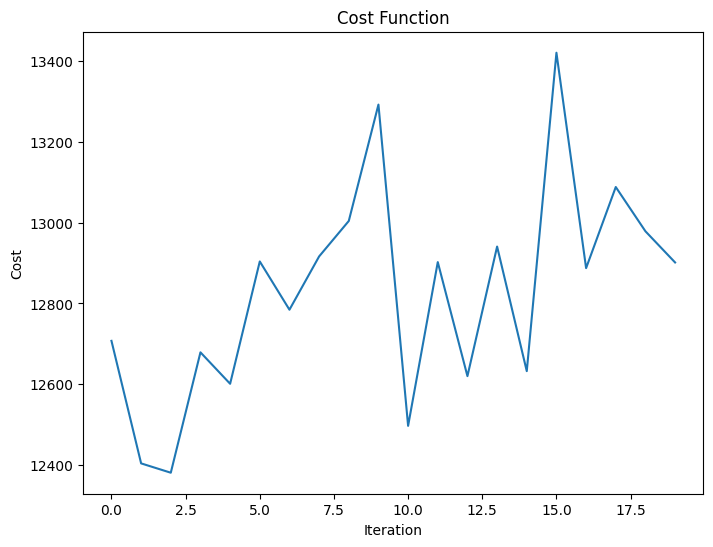

<Figure size 1200x600 with 0 Axes>

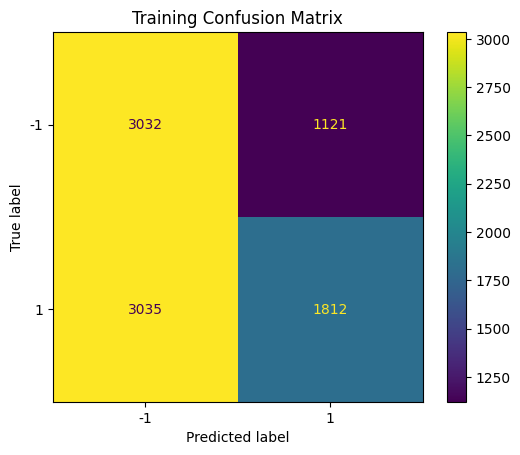

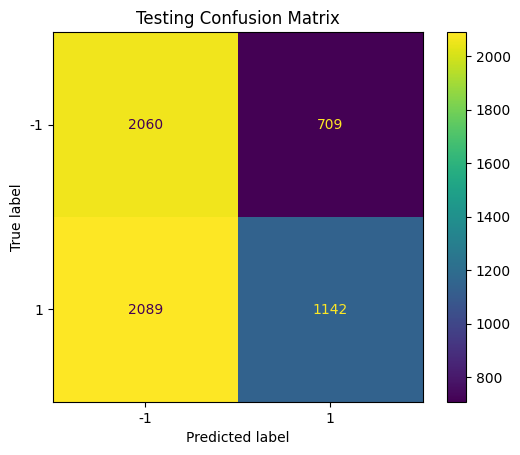

In [40]:
svm = KernelSVM(train_dfsample,test_dfsample,kernel='linear', C=1)
svm.classification_report()

In [ ]:
#scikit learn SVM

C:\Users\ameya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


TRAINING RESULTS 

              precision    recall  f1-score   support

          -1       0.53      0.37      0.44     14792
           1       0.56      0.71      0.63     16923

    accuracy                           0.55     31715
   macro avg       0.54      0.54      0.53     31715
weighted avg       0.55      0.55      0.54     31715

TESTING RESULTS 

              precision    recall  f1-score   support

          -1       0.52      0.36      0.42      3698
           1       0.56      0.71      0.63      4231

    accuracy                           0.55      7929
   macro avg       0.54      0.53      0.53      7929
weighted avg       0.54      0.55      0.53      7929



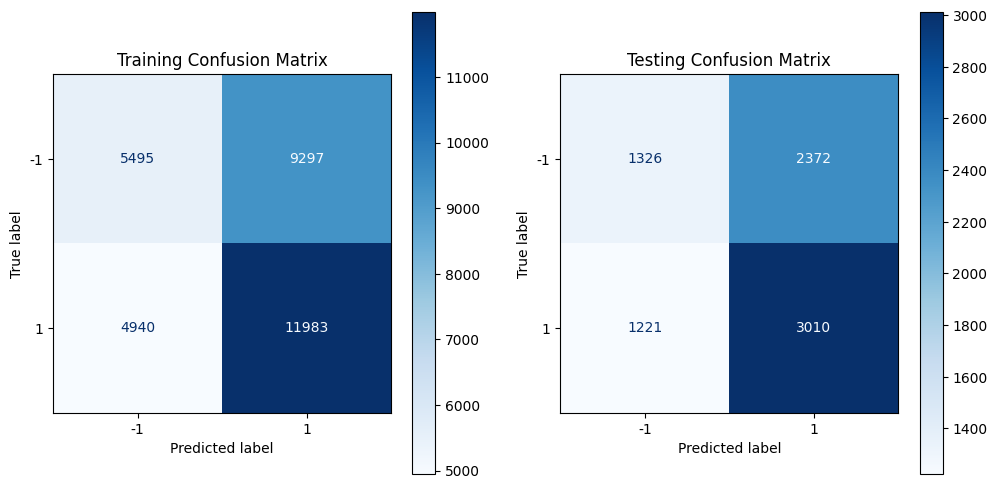

In [55]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df=pd.read_excel("data.xlsx")
df=df.drop('Unnamed: 0',axis=1)
df['popularity'] = df['popularity'].map({0:-1, 1:1})

# Train-test split
train_dfsample, test_dfsample = train_test_split(df, test_size=0.2, stratify=df['popularity'])

# Preprocessing
scaler = StandardScaler()
X_train = train_dfsample.drop('popularity', axis=1)
y_train = train_dfsample['popularity']
X_test = test_dfsample.drop('popularity', axis=1)
y_test = test_dfsample['popularity']

# Fit the scaler only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm = SVC(kernel='linear', C=1, max_iter=100)  # You can adjust C and max_iter
svm.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

# Metrics
print("TRAINING RESULTS \n")
print(classification_report(y_train, y_train_pred))

print("TESTING RESULTS \n")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
train_cm = confusion_matrix(y_train, y_train_pred, labels=[-1, 1])
test_cm = confusion_matrix(y_test, y_test_pred, labels=[-1, 1])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay(train_cm, display_labels=[-1, 1]).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Training Confusion Matrix')
ConfusionMatrixDisplay(test_cm, display_labels=[-1, 1]).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Testing Confusion Matrix')
plt.show()
